# EXPLORING DATA

In [2]:
# libraries to describe de data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer 
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
from PIL import Image
from nltk.probability import FreqDist
import random
import re


plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data understanding

### EDA: Tweets 2019

In [3]:
df_tweets = pd.read_csv('data/tweets.csv') # read the csv file

In [4]:
df_tweets.shape # shows the number of rows and columns

(303007, 9)

In [5]:
df_tweets.info() # shows the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303007 entries, 0 to 303006
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   full_text        303007 non-null  object
 1   user             303007 non-null  object
 2   location         303007 non-null  object
 3   date             303007 non-null  object
 4   tweet_id         303007 non-null  int64 
 5   number_rt        303007 non-null  int64 
 6   number_likes     303007 non-null  int64 
 7   number_reply     303007 non-null  int64 
 8   conversation_id  303007 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 20.8+ MB


In [6]:
df_tweets.describe() # shows the mean, std, min, max, etc. of each column

,tweet_id,number_rt,number_likes,number_reply,conversation_id
count,3.030070e+05,303007.000000,303007.000000,303007.000000,3.030070e+05
mean,1.304240e+18,4.954361,14.855284,1.250836,1.303746e+18
std,1.341421e+17,62.940711,217.527907,19.453874,1.346152e+17
min,1.079890e+18,0.000000,0.000000,0.000000,6.746151e+09
25%,1.186349e+18,0.000000,0.000000,0.000000,1.186010e+18
50%,1.295909e+18,0.000000,1.000000,0.000000,1.295434e+18
75%,1.425999e+18,1.000000,4.000000,1.000000,1.425785e+18
max,1.531424e+18,13921.000000,63276.000000,3655.000000,1.531424e+18


#### Full text

In [7]:
df_tweets['full_text'].str.len().describe()

count    303007.000000
mean        199.381486
std          78.182300
min           6.000000
25%         137.000000
50%         212.000000
75%         264.000000
max         963.000000
Name: full_text, dtype: float64

In terms of tweet text length measured in characters, we found an average of 143 characters, a maximum of 689 characters and a minimum of 7 characters.

In [8]:
full_text_char = df_tweets['full_text'].str.len()

In [9]:
print(full_text_char.quantile(0.05))
print(full_text_char.quantile(0.25))
print(full_text_char.quantile(0.5))
print(full_text_char.quantile(0.75))
print(full_text_char.quantile(0.95))

68.0
137.0
212.0
264.0
298.0


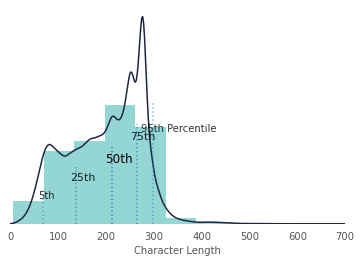

In [10]:
fig, ax = plt.subplots(figsize = (6,4))


# Plot
    # Plot histogram
full_text_char.plot(kind = "hist", density = True, alpha = 0.65, bins = 15,color='#5BC0BE') # change density to true, because KDE uses density
#5BC0BE
#6FFFE9
#CCC9DC

# Plot KDE
full_text_char.plot(kind = "kde",color='#1C2541')
#0C1821
#1B2A41
#1C2541

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = full_text_char.quantile(0.05), full_text_char.quantile(0.25), full_text_char.quantile(0.5), full_text_char.quantile(0.75), full_text_char.quantile(0.95)
# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
# Text on the lines
ax.text(quant_5-10, 0.001, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-13, 0.0017, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-13, 0.0024, "50th", size = 12, alpha = 1)
ax.text(quant_75-13, 0.0033, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-25, 0.0036, "95th Percentile", size = 10, alpha =.8) 


# X #
ax.set_xlabel("Character Length",size = 10) 
ax.set_xlim(0, 700)

# Y #
#ax.set_ylim(0, 1)

# Overall #
#ax.set_title("Character Length Distribution",size=14, pad=20)

# Remove y ticks
ax.set_yticks([])
    # Relabel the axis as "Frequency"
ax.set_ylabel("")

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

plt.style.use("bmh") 

# Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

   
plt.show()

According to the graph above, we can find that the distribution is skewed to the right. There are more sensitive or controversial topics that require a greater extension of characters. For this, we move on to analyze the words within the tweet.

In [11]:
full_text_words=df_tweets['full_text'].str.split().str.len()

In [12]:
full_text_words.describe()

count    303007.000000
mean         31.333266
std          12.550293
min           1.000000
25%          21.000000
50%          32.000000
75%          41.000000
max         103.000000
Name: full_text, dtype: float64

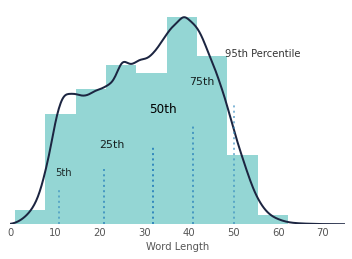

In [13]:
fig, ax = plt.subplots(figsize = (6,4))


# Plot
    # Plot histogram
full_text_words.plot(kind = "hist", density = True, alpha = 0.65, bins = 15,color='#5BC0BE') # change density to true, because KDE uses density
#5BC0BE
#6FFFE9
#CCC9DC

#kde
full_text_words.plot(kind = "kde",color='#1C2541')
#0C1821
#1B2A41
#1C2541

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = full_text_words.quantile(0.05), full_text_words.quantile(0.25), full_text_words.quantile(0.5), full_text_words.quantile(0.75), full_text_words.quantile(0.95)
# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
# Text on the lines
ax.text(quant_5-1, 0.007, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-1, 0.011, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-1, 0.016, "50th", size = 12, alpha = 1)
ax.text(quant_75-1, 0.020, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-2, 0.024, "95th Percentile", size = 10, alpha =.8) 


# X #
ax.set_xlabel("Word Length",size = 10) 
ax.set_xlim(0, 75)

# Y #
#ax.set_ylim(0, 1)

# Overall #
#ax.set_title("Character Length Distribution",size=14, pad=20)

# Remove y ticks
ax.set_yticks([])
    # Relabel the axis as "Frequency"
ax.set_ylabel("")

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

plt.style.use("bmh") 

# Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

   
plt.show()

In terms of tweet text length measured in words, we found an average of 22 words, a maximum of 75 words and a minimum of 1 word. 

We observe the same behavior when we look at the distribution in terms of words. We will proceed to review the tweets that contain the minimum and maximum number of words.

In [14]:
data_tweet=df_tweets.copy() # copy the dataframe
data_tweet['num_words']=df_tweets['full_text'].str.split().str.len() # create a new column with the number of words in each tweet
data_tweet['num_char']=df_tweets['full_text'].str.len() # create a new column with the number of characters in each tweet

In [15]:
data_tweet['num_words'].value_counts().reset_index().sort_values(by='index',ascending=False) # shows the number of words in each tweet

,index,num_words
98,103,1
90,101,1
91,100,1
85,99,2
88,98,2
...,...,...
51,5,677
53,4,446
56,3,267
59,2,134


In [16]:
data_tweet[['full_text','num_words']][data_tweet['num_words']<=2].sort_values(by='num_words').sample(10, random_state=6)

,full_text,num_words
236609,¡Mucha mamacita!,2
238376,Metro Medellín,2
46381,Prepárense,1
244080,@RicardoFloresG Pues…https://t.co/Nvt8twn8kx,2
241716,¡Muy lamentable!,2
46745,Dimensión Bosque,2
41259,QUIERO,1
185744,aplausos,1
195112,Mapa interactivo,2
37100,Allá vamos,2


In [17]:
data_tweet[['full_text','num_words']][data_tweet['num_words']<=2].sort_values(by='num_words').sample(10) # shows the tweets with 75 words or 1 word

,full_text,num_words
195127,Mapa interactivo,2
295644,Experiencia valiosa!,2
146753,#metro#picoyplaca#Medellín#trabajo#elmetromem...,1
114257,¡Mucha mamacita!,2
236419,Hipócritas,1
27640,#TrabajoSiHay Medellín,2
236609,¡Mucha mamacita!,2
38857,Medellín ejemplo,2
195126,Mapa interactivo,2
257487,Muy bien,2


We can observe how the tweets with fewer words (2 or less), the word "Medellin" is the most recurrent. This is because it is our main search topic. In the case of tweets with exactly two words, "Medellin" appears accompanied by a mention, an emoticon, a year, among others.

In [18]:
data_tweet.loc[8374,'full_text'] # shows the tweet with the index 8374

' @AlcaldiadeMed he enviado mensaje por Twitter, Facebook, Correo Webmaster de la alcaldía y nadie me responde nada. Que hacemos si necesitamos registrar la empresa para el permiso el lunes y no llega el correo? Portal Medellin me cuida empresas.'

In [19]:
list=[65,67,69,75]
data_large=data_tweet[['tweet_id','full_text','num_words']][(data_tweet['num_words']).isin(list)].sort_values(by='num_words') # shows the tweets with the words 65, 67, 69

In [20]:
data_large

,tweet_id,full_text,num_words
81867,1228128772504850434,@sttmed @CadenaGaitan @AlcaldiadeMed @EPMesta...,65
254483,1229155933525348352,@rfabuabara @potogalindo @richizuluaga @MILTO...,65
79309,1320005755001573377,@brisa7766433br1 @SinLaMente @Oscarperiodista...,65
253120,1217336401240391687,@esotom1 @NarvarteVecinos @Claudiashein @Mile...,65
150699,1172814223484887040,@JorgeDeTellus @HOLLMANMORRIS @Juan_Florez @n...,65
...,...,...,...
137550,1309307830223200261,@Luiscarlosj6 @ContramiElmundo @CadenaGaitan ...,69
2277,1458548060632588289,@AmLuiissa @JorgeCa37857757 @VivianaUribista ...,69
122544,1416836592862380036,@Kevindiossa @CNE_COLOMBIA @PaolaHolguin @Fic...,75
137409,1274764550827630599,@CamiloGuerreroB @Pedro47276558 @richizuluaga...,75


In [21]:
print(data_large.iloc[0,1],"\n"+"-"*20,data_large.iloc[1,1],"\n"+"-"*20,data_large.iloc[2,1],"\n"+"-"*20,data_large.iloc[3,1])

 @sttmed @CadenaGaitan @AlcaldiadeMed @EPMestamosahi @Fenalco_Ant @ANDI_Colombia @Areametropol @Bancolombia @GobAntioquia @AlcaldiaEnv @AlcSabaneta @AlcaldiadeBello @AlcaldiaItagui @AlcaldEstrella @Sura @Cementos_Argos @Celsia_Energia @EAFIT @UdeA @UdeMedellin_ @ITM_Medellin ¡Hola! Claro, nuestro trabajo está enfocado en generar calidad de vida y en la #MovilidadSostenible, y ambas están muy ligadas con la iniciativa #DosHorasPorElAire y con todas aquellas que vayan en pro de la calidad del aire de nuestra ciudad - región. Quedamos atentos. 
--------------------  @rfabuabara @potogalindo @richizuluaga @MILTONALBERTORO @OtroMemin @Ed_perezP @GoRiveros @SoyAlejoGomez @mitos33 @DCBOGOTA35 @bascobscd @petrogustavo @ingrodolfohdez @Wikipedia @Twitter Por qué debo creerte? Los chinos han hecho grandes obras, pero es que en su país robar en este tipo de cosas se castiga con la muerte, acá es muy diferente. Ojalá sean así, subterráneas las demás. El metro de Medellín no es feo pero sus condici

When looking at the texts with greater word length, we highlight two points: 
1. The large use of mentions using the at-word extends the length of the tweet and would not provide relevant information for sentiment analysis so deletion could be considered.
2. Something to keep in mind when including Medellin in the text of the tweet is that this may not only refer to the city, but also to the soccer team "Deportivo Independiente Medellin" so we must know how to differentiate this if we want to draw conclusions.
3. The tweets with fewer words associate their text with the word "Medellin" accompanied by something else, this alone would not be relevant for our analysis so it could be given a special treatment. 

#### Number of likes

In [22]:
data_tweet.sort_values(by='number_likes',ascending=False) # sorts the dataframe by the number of words in each tweet

,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,num_words,num_char
50388,Con Kellyth Garces y su hijo Justin. Ella fue...,petrogustavo,"Medellín, Colombia",2022-05-29 00:41:28+00:00,1530710884892520448,13921,63276,3655,1530710884892520448,35,187
285984,Cada día me levanto para trabajar contra la p...,QuinteroCalle,"Medellín, Colombia",2021-05-19 14:52:55+00:00,1395029709939937282,5629,28435,2364,1395029709939937282,38,230
98825,He pedido a la Policía de Medellín no hacer u...,QuinteroCalle,"Medellín, Colombia",2019-11-26 15:52:14+00:00,1199355189565759488,4485,26676,2419,1199355189565759488,36,224
258005,Posibilidad de contagio en el Metro de Medell...,diegoalejocm,"Bogotá, D.C., Colombia",2020-03-09 15:00:36+00:00,1237030531533090816,3525,22137,279,1237030531533090816,23,138
233398,No van a creer a quien me encontré en el metr...,alejo_cueto,"Medellín, Colombia",2021-10-31 17:09:42+00:00,1454858127971598340,588,18592,52,1454858127971598340,14,61
...,...,...,...,...,...,...,...,...,...,...,...
199389,@jomac51287352 Hola. Te informamos que este A...,sttmed,"Funza, Colombia",2021-02-05 19:49:56+00:00,1357778504339832834,0,0,0,1357744117330100226,35,201
90162,@arq_medellin Hermosa homilía de Ricardo Tobo...,Dubis21,"Envigado, Colombia",2019-06-03 23:48:46+00:00,1135694845601861634,0,0,0,1135603092228104192,35,211
90160,Últimas Noticias: Ofrece resultados positivos...,vmtv_12,"Envigado, Colombia",2019-06-04 01:06:23+00:00,1135714379687530496,0,0,0,1135714379687530496,37,279
199392,@DespiertaAnt @CadenaGaitan @sttmed @Alcaldia...,juankbte,"Funza, Colombia",2021-02-05 19:15:25+00:00,1357769818297028609,0,0,0,1357628885064699904,34,226


In [23]:
data_tweet.loc[11050,"full_text"] # shows the first tweet

' @DW_Camacho @juank762 @AlejoPalacioRes Es politizar una empresa que se ha manejado bien siempre. Hace 2 años Colombia entró a la OCDE y la primera recomendación era Buen Gobierno en empresas públicas. Medellín había implementado esto hace 13 años hasta esta semana que el Quintero se tiró en todo.'

#### Number of reply

In [24]:
data_tweet.sort_values(by='number_reply',ascending=False) # sorts the dataframe by the number of words in each tweet

,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,num_words,num_char
50388,Con Kellyth Garces y su hijo Justin. Ella fue...,petrogustavo,"Medellín, Colombia",2022-05-29 00:41:28+00:00,1530710884892520448,13921,63276,3655,1530710884892520448,35,187
134988,El alcalde @QuinteroCalle ofrece trabajo y se...,MariaFdaCabal,"Bogotá, D.C., Colombia",2020-07-26 14:17:59+00:00,1287391722012581889,2083,3349,2620,1287391722012581889,38,256
183215,El alcalde @QuinteroCalle ofrece trabajo y se...,MariaFdaCabal,"Bello, Colombia",2020-07-26 14:17:59+00:00,1287391722012581889,2083,3349,2620,1287391722012581889,38,256
98825,He pedido a la Policía de Medellín no hacer u...,QuinteroCalle,"Medellín, Colombia",2019-11-26 15:52:14+00:00,1199355189565759488,4485,26676,2419,1199355189565759488,36,224
285984,Cada día me levanto para trabajar contra la p...,QuinteroCalle,"Medellín, Colombia",2021-05-19 14:52:55+00:00,1395029709939937282,5629,28435,2364,1395029709939937282,38,230
...,...,...,...,...,...,...,...,...,...,...,...
147620,#clima en #chile y los #helicopteros haciendo...,casara73,"Medellín, Colombia",2019-11-17 19:51:38+00:00,1196153945711886337,0,0,0,1196153945711886337,18,136
147621,@Lazos_Mx @NEL_Guayaquil @nel_amp @2020_amp @...,AnaRicaurte1,"Medellín, Colombia",2019-11-17 19:49:13+00:00,1196153335671349249,0,2,0,1194995936042405890,44,284
147622,¿Deseas trabajar con nosotros? Comunícate 📞 3...,DugoStudios,"Medellín, Colombia",2019-11-17 19:28:20+00:00,1196148081424830464,0,0,0,1196148081424830464,33,248
147623,¿Te gustaría estar en nuestro equipo de traba...,EstudiosIdyll,"Medellín, Colombia",2019-11-17 19:27:46+00:00,1196147937966993409,0,0,0,1196147937966993409,30,225


In [25]:
data_tweet.loc[16498,"full_text"] # shows the first tweet

' Según el medio colombiano El Espectador más de 10 mil personas asistieron al estadio Atanasio Girardot para ver a #ChristianNodal'

#### Number of retweet

In [26]:
data_tweet.sort_values(by='number_rt',ascending=False) # sorts the dataframe by the number of words in each tweet

,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,num_words,num_char
50388,Con Kellyth Garces y su hijo Justin. Ella fue...,petrogustavo,"Medellín, Colombia",2022-05-29 00:41:28+00:00,1530710884892520448,13921,63276,3655,1530710884892520448,35,187
285984,Cada día me levanto para trabajar contra la p...,QuinteroCalle,"Medellín, Colombia",2021-05-19 14:52:55+00:00,1395029709939937282,5629,28435,2364,1395029709939937282,38,230
54327,Escalofriante. Hace casi 40 años el ministro ...,HELIODOPTERO,"Medellín, Colombia",2022-04-08 17:14:12+00:00,1512478929973653505,5581,11687,418,1512478929973653505,46,262
295962,Esto causa una vergüenza infinita... jóvenes ...,gaitan_presente,"Medellín, Colombia",2019-02-24 17:38:34+00:00,1099725284289495042,4662,4174,492,1099725284289495042,32,238
166674,#Atentos | Investigaciones revelan que Federi...,NT24co,"Medellín, Colombia",2022-03-31 15:40:45+00:00,1509556312295845888,4582,6349,213,1509556312295845888,31,209
...,...,...,...,...,...,...,...,...,...,...,...
120063,@Almtgb @BernardoAGuerra @AlcaldiadeMed @Quin...,Felipe_A9,"Bogotá, D.C., Colombia",2021-09-23 15:21:26+00:00,1441060141537792006,0,0,0,1423669400687845390,60,484
120064,1semana de salario aquí #empleo #trabajo #col...,eroox_kinky,"Bogotá, D.C., Colombia",2021-09-23 15:07:58+00:00,1441056752892514304,0,0,0,1441056752892514304,26,275
120065,Miedo? Sabe que da miedo? Salir en Medellin c...,smcr66,"Bogotá, D.C., Colombia",2021-09-23 15:02:05+00:00,1441055275709083654,0,0,0,1441055275709083654,41,214
120066,Cada día admiro más al Gran Colombiano @Alvar...,JFECHEV,"Bogotá, D.C., Colombia",2021-09-23 14:50:17+00:00,1441052306359808011,0,0,0,1441052306359808011,35,240


In [27]:
data_tweet.loc[6807,"full_text"] # shows the first tweet']

' #CongresoFuturoSostenible | “La función entre universidad, empresa, estado y ciudadanos es fundamental para la transformación de Medellín a partir de la innovación” @Sebastian_TIC Subsecretario Tecnologías de la Información @AlcaldiadeMed. Conéctate ➡️'

#### Location

In [28]:
location_tweets=data_tweet['location'] # shows the tweets with a location

In [29]:
data_location=location_tweets.groupby(location_tweets).size().reset_index(name="counts").sort_values(by="counts") # shows the number of tweets with each location
data_location

,location,counts
147,"Viña del Mar, Chile",41
18,"Beijing, People's Republic of China",50
17,"Bayamón, Puerto Rico",56
23,"Brooklyn, NY",60
92,"Nava, Coahuila de Zaragoza",65
...,...,...
15,"Barranquilla, Colombia",4612
52,"Envigado, Colombia",8199
19,"Bello, Colombia",8989
21,"Bogotá, D.C., Colombia",27213


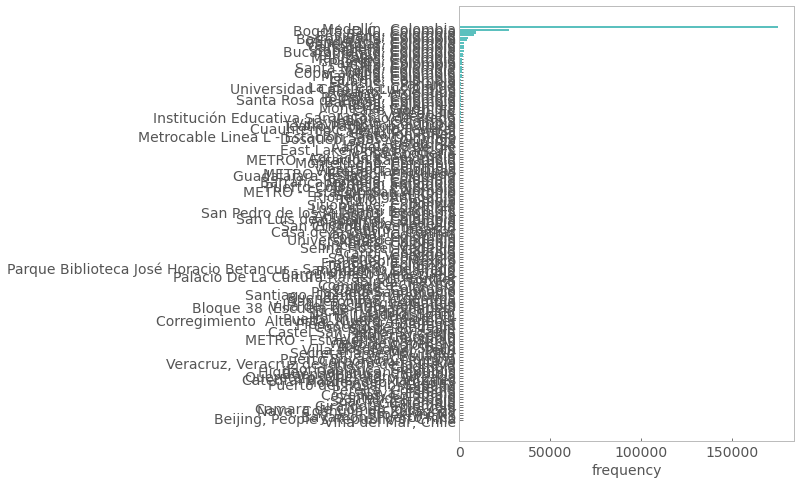

In [30]:
fig, ax = plt.subplots(figsize = (6,8))
plt.barh(data_location.location, data_location.counts,color="#5BC0BE") # plots the number of tweets with each location

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=14)


 
# setting label of x-axis
plt.xlabel("frequency",size=14)
#plt.title("")
plt.show()

It is to be expected that most of the tweets are located in the city of Medellin because this word was used in the search. However, scattered locations were found that also refer to the target city. As an example, a tweet was extracted from the city of Arequipa, Peru and this was the result: "Now that they just gave us 3 goals, with Guerrero included, I'm going to uncork a Medellin and prepare a cuba while listening to Janis. Have a good night". The curious thing is that when he refers to Medellín he is not alluding to the city but to Ron Medellín liquor. This only corroborates that a word without context can lead us to unexpected results.

#### Time

In [31]:
data_tweet['day']=pd.to_datetime(data_tweet['date']).dt.day # creates a new column with the day of the week
data_tweet['month_name']=pd.to_datetime(data_tweet['date']).dt.month_name() # creates a new column with the month of the tweet
data_tweet['year']=pd.to_datetime(data_tweet['date']).dt.year # creates a new column with the year
data_tweet['hour']=pd.to_datetime(data_tweet['date']).dt.hour # creates a new column with the hour of the day
data_tweet['day_of_week']=pd.to_datetime(data_tweet['date']).dt.dayofweek # creates a new column with the day of the week
data_tweet['month-year']=pd.to_datetime(data_tweet['date']).dt.strftime('%Y-%m')

In [41]:
data_tweet.head(10)

,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,num_words,num_char,day,month_name,year,hour,day_of_week,month-year
0,"#AliadosSemana Jorge Andrés Carrillo Cardoso,...",RevistaSemana,"Medellín, Colombia",2021-10-27 23:37:00+00:00,1453506043363971074,1,3,1,1453506043363971074,37,248,27,October,2021,23,2,2021-10
1,@minuto30com A el no le cuesta ni le cistara ...,Waac0370,"Medellín, Colombia",2021-10-27 23:16:38+00:00,1453500919207927809,0,2,0,1453486400490332163,45,251,27,October,2021,23,2,2021-10
2,@QuinteroCalle Lo quiero ver a usted @Quinter...,pelortiz,"Medellín, Colombia",2021-10-27 23:12:25+00:00,1453499858833354756,0,1,0,1453497447460872193,37,286,27,October,2021,23,2,2021-10
3,@QuinteroCalle @AlcaldiadeMed ese discurso es...,coherederocrist,"Medellín, Colombia",2021-10-27 21:57:58+00:00,1453481123279872005,1,3,0,1453460986321686533,34,227,27,October,2021,21,2,2021-10
4,@pelusherojo @anamarqr @patriciayorkyy Increí...,exfuncionarios,"Medellín, Colombia",2021-10-27 21:48:50+00:00,1453478822158942224,17,40,0,1453423807713185792,40,250,27,October,2021,21,2,2021-10
5,#ConexiónSinFronteras nos trae a talentos col...,acimedellin,"Medellín, Colombia",2021-10-27 20:51:34+00:00,1453464413567082497,5,6,0,1453464413567082497,34,234,27,October,2021,20,2,2021-10
6,Empresa de comunicacion y radio requiere: DIR...,HUMANVIVE,"Medellín, Colombia",2021-10-27 20:05:31+00:00,1453452821823729680,0,0,0,1453452821823729680,30,209,27,October,2021,20,2,2021-10
7,@CARLOSFMEJIA @QHARZO @elcolombiano #Medellin...,phpatino,"Medellín, Colombia",2021-10-27 18:49:12+00:00,1453433617686966275,5,5,0,1453405970277732352,45,310,27,October,2021,18,2,2021-10
8,@elcolombiano Esos de izquierda van a acabar ...,FelipeA35044350,"Medellín, Colombia",2021-10-27 18:47:34+00:00,1453433207693664259,1,1,0,1453387543827910663,52,291,27,October,2021,18,2,2021-10
9,No vamos a permitir que @QuinteroCalle y sus ...,JuliaCorreaNutt,"Medellín, Colombia",2021-10-27 17:58:03+00:00,1453420746743631883,223,530,12,1453420746743631883,38,250,27,October,2021,17,2,2021-10


#### Tweet understanding

In [32]:
# import shape for our word cloud
char_mask = np.array(Image.open('figures/twitter.png'))

# figure size in inches
sns.set(rc={'figure.figsize':(5,16)})

# function to plot th word cloud

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(179, 44%%, %d%%)" % random.randint(30, 70)

def plot_word_cloud(char_mask, word_fre):
  # generating the wordcloud
  wordcloud = WordCloud(background_color='white',
                        mask=char_mask,
                        contour_color="#1C2541",
                        contour_width=3,
                        max_words=2000).generate_from_frequencies(word_fre)
  # plotting the WordCloud
  # plot the word cloud 
  #0C1821
  #1B2A41
  #1C2541
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")

  #to remove axis value
  plt.axis('off')
  plt.show()

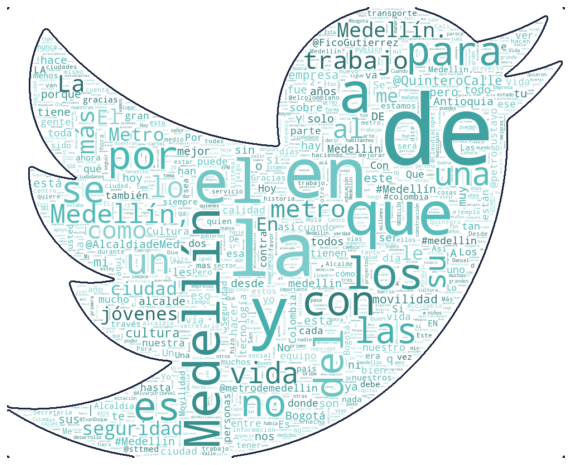

In [33]:
word_tweet_cloud=[]
for tweet in data_tweet['full_text']:
    for words in tweet.split():
        word_tweet_cloud.append(words)
word_fre = FreqDist(word_tweet_cloud)
plot_word_cloud(char_mask, word_fre)

In [34]:
word_fre.most_common(30)

[('de', 567457),
 ('la', 313865),
 ('en', 277906),
 ('y', 251244),
 ('que', 204731),
 ('el', 195569),
 ('a', 174579),
 ('Medellín', 133692),
 ('los', 100770),
 ('con', 88610),
 ('para', 84529),
 ('por', 81828),
 ('es', 81678),
 ('del', 81183),
 ('no', 73786),
 ('se', 71220),
 ('un', 69356),
 ('las', 62795),
 ('una', 51807),
 ('su', 44765),
 ('vida', 42682),
 ('lo', 42167),
 ('al', 37099),
 ('Medellín,', 36635),
 ('más', 32766),
 ('trabajo', 32459),
 ('como', 32272),
 ('metro', 31570),
 ('La', 27025),
 ('Medellín.', 26928)]

In [35]:
dict_to_df = {'word':[],'frequency':[]}
for key, value in word_fre.items():
  dict_to_df['word'].append(key)
  dict_to_df['frequency'].append(value)

# create a Df with th efrequency of each word
df_words = pd.DataFrame.from_dict(dict_to_df)
df_words=df_words.sort_values(by='frequency',ascending=False).head(30).sort_values(by='frequency',ascending=True)
df_words

,word,frequency
148,Medellín.,26928
286,La,27025
2489,metro,31570
55,como,32272
619,trabajo,32459
134,más,32766
448,"Medellín,",36635
12,al,37099
159,lo,42167
176,vida,42682


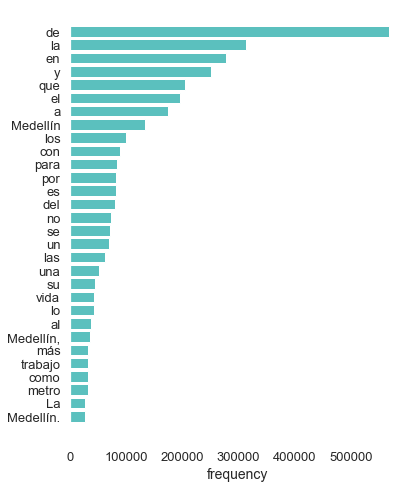

In [36]:
fig, ax = plt.subplots(figsize = (6,8))
plt.barh(df_words.word, df_words.frequency,color="#5BC0BE") # plots the number of tweets with each location

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis
plt.xlabel("frequency",size=14)
#plt.title("")
plt.show()